In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
data = pd.read_csv('Data/Parkinson Disease/parkinsons.data')
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
data.shape

(195, 24)

In [4]:
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [7]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

## EDA

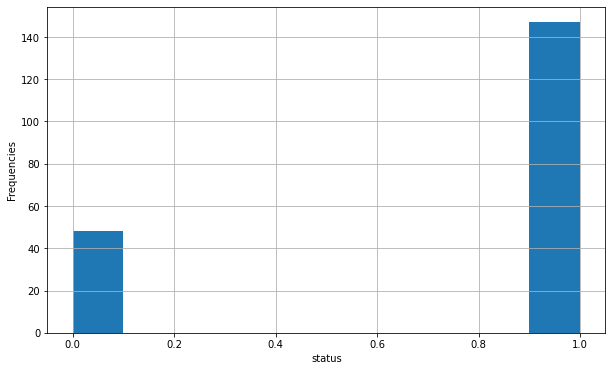

In [8]:
plt.figure(figsize=(10, 6))
data.status.hist()
plt.xlabel('status')
plt.ylabel('Frequencies')
plt.plot();

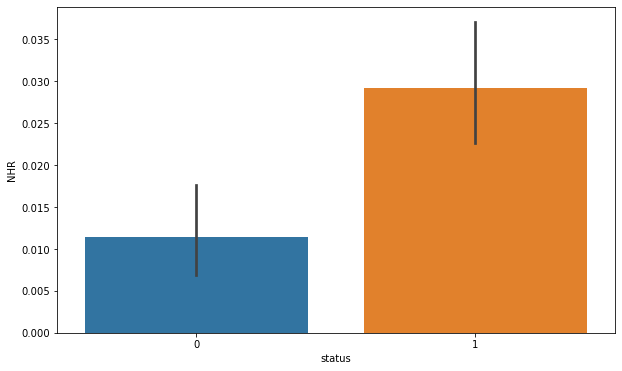

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x="status",y="NHR",data=data);

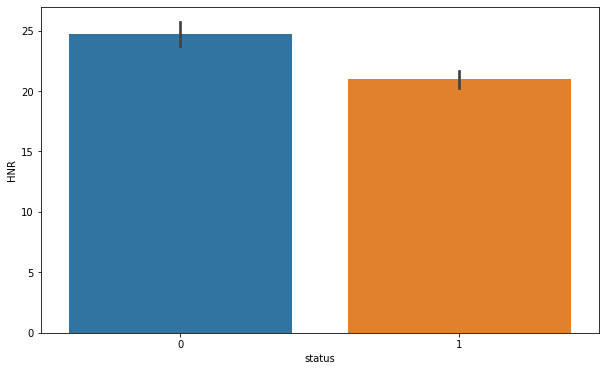

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x="status",y="HNR",data=data);

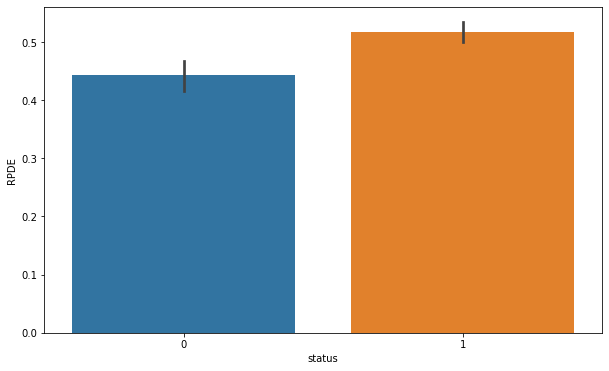

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x="status",y="RPDE",data=data);

## Distribution plot

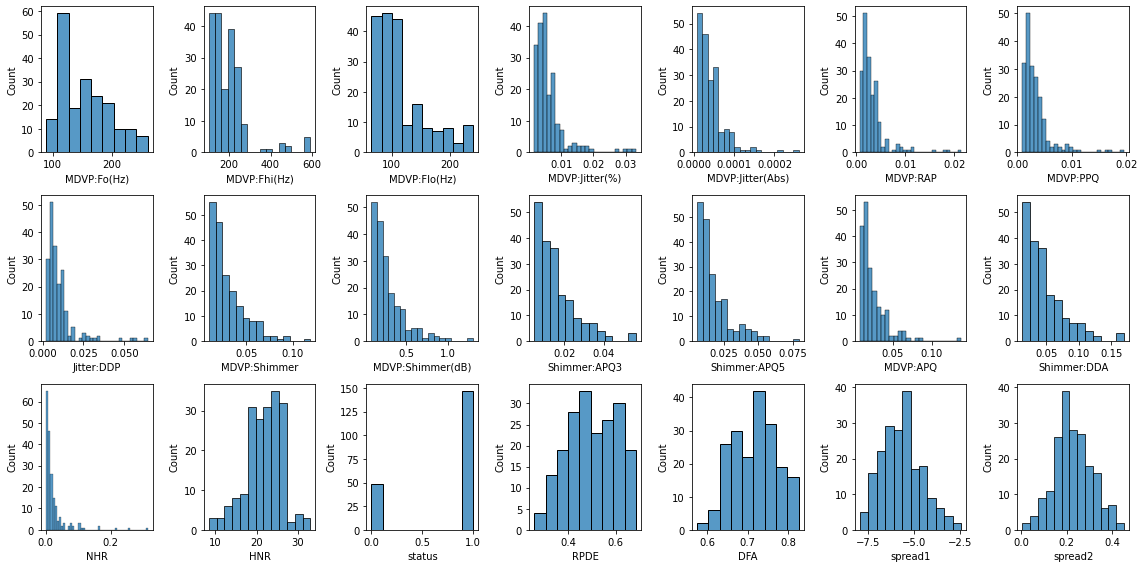

In [12]:
rows=3
cols=7
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(16,8))
col=data.columns
index=1
for i in range(rows):
    for j in range(cols):
        sns.histplot(data[col[index]],ax=ax[i][j])
        index=index+1     
plt.tight_layout()

In [13]:
data.drop(['name'],axis=1,inplace=True)

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(data.drop(labels=['status'],axis=1),data['status'],test_size=0.2,random_state=40)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(156, 22) (39, 22) (156,) (39,)


## Model Building

**Logistic Regression**

In [15]:
model = LogisticRegression(max_iter=1000).fit(X_train, Y_train)

In [16]:
train_preds = model.predict(X_train)
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds))

Model accuracy on train is:  0.8653846153846154


In [17]:
test_preds = model.predict(X_test)
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds))

Model accuracy on test is:  0.8717948717948718


In [18]:
#Confusion matrix
cm = metrics.confusion_matrix(Y_test, test_preds)
print(pd.DataFrame(cm))

   0   1
0  5   3
1  2  29


In [19]:
# Wrong Predictions made.
print((Y_test !=test_preds).sum(),'/',((Y_test == test_preds).sum()+(Y_test != test_preds).sum()))

5 / 39


In [20]:
# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds))

KappaScore is:  0.587737843551797


**Random Forest**

In [21]:
model = RandomForestClassifier().fit(X_train,Y_train)

In [22]:
train_preds = model.predict(X_train)
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds))

Model accuracy on train is:  1.0


In [23]:
test_preds = model.predict(X_test)
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds))

Model accuracy on test is:  0.8717948717948718


In [24]:
#Confusion matrix
cm = metrics.confusion_matrix(Y_test, test_preds)
print(pd.DataFrame(cm))

   0   1
0  6   2
1  3  28


In [25]:
# Wrong Predictions made.
print((Y_test !=test_preds).sum(),'/',((Y_test == test_preds).sum()+(Y_test != test_preds).sum()))

5 / 39


In [26]:
# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds))

KappaScore is:  0.6242774566473989


**Decision Trees**

In [27]:
model = DecisionTreeClassifier().fit(X_train,Y_train)

In [28]:
train_preds = model.predict(X_train)
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds))

Model accuracy on train is:  1.0


In [29]:
test_preds = model.predict(X_test)
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds))

Model accuracy on test is:  0.8717948717948718


In [30]:
#Confusion matrix
cm = metrics.confusion_matrix(Y_test, test_preds)
print(pd.DataFrame(cm))

   0   1
0  5   3
1  2  29


In [31]:
# Wrong Predictions made.
print((Y_test !=test_preds).sum(),'/',((Y_test == test_preds).sum()+(Y_test != test_preds).sum()))

5 / 39


In [32]:
# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds))

KappaScore is:  0.587737843551797


**Naive Bayes Classifier**

In [33]:
model = GaussianNB().fit(X_train,Y_train)

In [34]:
train_preds = model.predict(X_train)
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds))

Model accuracy on train is:  0.7307692307692307


In [35]:
test_preds = model.predict(X_test)
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds))

Model accuracy on test is:  0.6923076923076923


In [36]:
#Confusion matrix
cm = metrics.confusion_matrix(Y_test, test_preds)
print(pd.DataFrame(cm))

    0   1
0   8   0
1  12  19


In [37]:
# Wrong Predictions made.
print((Y_test !=test_preds).sum(),'/',((Y_test == test_preds).sum()+(Y_test != test_preds).sum()))

12 / 39


**K-NearestNeighbours**

In [39]:
model = KNeighborsClassifier().fit(X_train,Y_train)

In [40]:
train_preds = model.predict(X_train)
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds))

Model accuracy on train is:  0.9102564102564102


In [41]:
test_preds = model.predict(X_test)
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds))

Model accuracy on test is:  0.8461538461538461


In [42]:
#Confusion matrix
cm = metrics.confusion_matrix(Y_test, test_preds)
print(pd.DataFrame(cm))

   0   1
0  4   4
1  2  29


In [43]:
# Wrong Predictions made.
print((Y_test !=test_preds).sum(),'/',((Y_test == test_preds).sum()+(Y_test != test_preds).sum()))

6 / 39


**SupportVectorMachine**

In [45]:
model = SVC(kernel='linear').fit(X_train, Y_train)

In [46]:
train_preds = model.predict(X_train)
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds))

Model accuracy on train is:  0.8782051282051282


In [47]:
test_preds = model.predict(X_test)
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds))

Model accuracy on test is:  0.8974358974358975


In [48]:
#Confusion matrix
cm = metrics.confusion_matrix(Y_test, test_preds)
print(pd.DataFrame(cm))

   0   1
0  5   3
1  1  30


In [49]:
# Wrong Predictions made.
print((Y_test !=test_preds).sum(),'/',((Y_test == test_preds).sum()+(Y_test != test_preds).sum()))

4 / 39
